<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/Car_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIM: Car Purchase Prediction.

# Part-1: Data Preprocessing

## Data & Library Importation

In [ ]:
#importing Library for reading, writing & perform basic operations
import numpy as np
import pandas as pd

# Import Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
c_data = pd.read_csv("/content/car data.csv")

In [ ]:
# Preview data

c_data.head(-5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0


## Data Exploration

In [ ]:
# View data shape

c_data.shape

(301, 9)

In [ ]:
# View Columns

c_data.columns[0:10]

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Statistical Summary

In [ ]:
c_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with Missing Values

In [ ]:
c_data.isnull().values.any(), c_data.isnull().values.sum()

(False, 0)

## Dataset Restructuring

In [ ]:
# Preview data head

c_data.head(-5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0


In [ ]:
# Observing Column "Car_Name"

c_data["Car_Name"].unique(), c_data["Car_Name"].nunique()

(array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
        's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
        '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
        'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
        'camry', 'land cruiser', 'Royal Enfield Thunder 500',
        'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
        'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
        'Royal Enfield Thunder 350', 'KTM 390 Duke ',
        'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
        'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
        'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
        'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
        'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
        'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
        'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
        'TVS A

In [ ]:
# "Car_Name" has no Statistical Relationship
# Dropping Column- "Car_Name"

c_data_1 = c_data.drop(columns= ["Car_Name"])

In [ ]:
# Preview Current Dataset head

c_data_1.head(-5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
291,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0


In [ ]:
# Creating a new Column - Car_Age

c_data_1["Car_Age"] = 2023 - c_data_1["Year"]

In [ ]:
# Previewing Datahead

c_data_1.head(-5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
291,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0,8
292,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0,7
293,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0,13
294,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0,9


In [ ]:
# "Year" has no Statistical Relationship
# Dropping Column- "Year"

c_data_2 = c_data_1.drop(columns= ["Year"])

In [ ]:
# Data heat Preview

c_data_2.head(-5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
291,5.40,6.10,31427,Petrol,Dealer,Manual,0,8
292,6.40,8.40,12000,Petrol,Dealer,Manual,0,7
293,3.25,9.90,38000,Petrol,Dealer,Manual,0,13
294,3.75,6.80,33019,Petrol,Dealer,Manual,0,9


## One Hot Encoding

### Categorical & Numerical columns' Check

In [ ]:
# Show Categorical Column

c_data_2.select_dtypes(include= "object").columns, len(c_data_2.select_dtypes(include= "object").columns)

(Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'), 3)

In [ ]:
# Showing number of Unique values each categorical column

c_data_2["Fuel_Type"].nunique(), c_data_2["Seller_Type"].nunique(), c_data_2["Transmission"].nunique()

(3, 2, 2)

In [ ]:
# Show Numerical Values

c_data_2.select_dtypes(include=["int64", "float64"]).columns , len(c_data_2.select_dtypes(include=["int64", "float64"]).columns)

(Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age'], dtype='object'),
 5)

In [ ]:
# Encoding The Categorical Columns
#1. Preview Dataset shape

c_data_2.shape

(301, 8)

In [ ]:
# OHE application
c_data_ohe = pd.get_dummies(data= c_data_2, drop_first= True)

In [ ]:
# Verify Data head

c_data_ohe.head(-5)

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
291,5.40,6.10,31427,0,8,0,1,0,1
292,6.40,8.40,12000,0,7,0,1,0,1
293,3.25,9.90,38000,0,13,0,1,0,1
294,3.75,6.80,33019,0,9,0,1,0,1


In [ ]:
# Verify data shape

c_data_ohe.shape

(301, 9)

## Correlation Matrix

In [ ]:
# Drop the Target/Dependent variable

c_data_3 = c_data_ohe.drop(columns= "Selling_Price")

In [ ]:
# Verify changes

c_data_3.head(-5)

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
291,6.10,31427,0,8,0,1,0,1
292,8.40,12000,0,7,0,1,0,1
293,9.90,38000,0,13,0,1,0,1
294,6.80,33019,0,9,0,1,0,1


<Axes: title={'center': 'Independent Variable correlation with Dependent Variable - Selling_price '}>

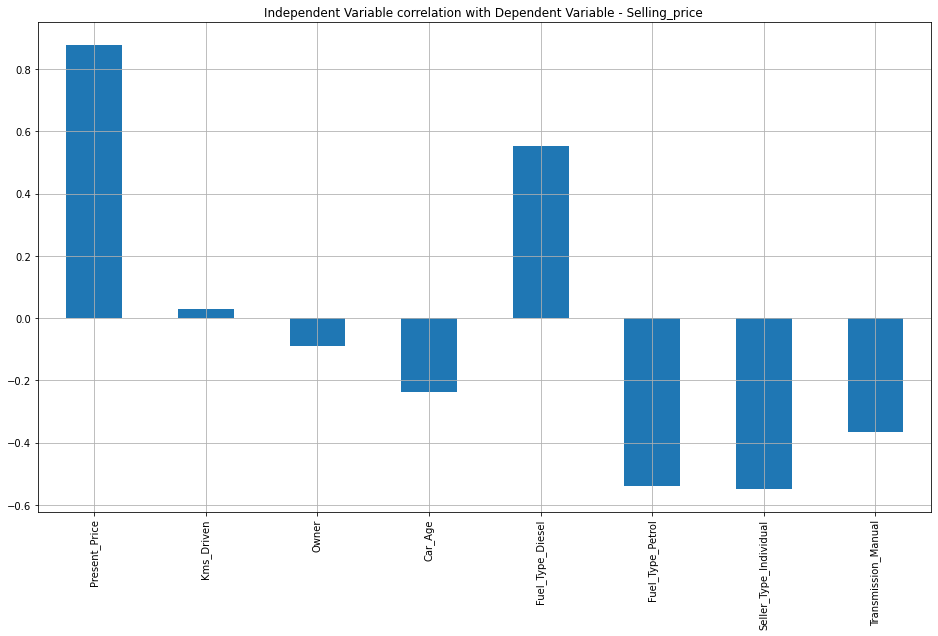

In [ ]:
c_data_3.corrwith(c_data_ohe["Selling_Price"]).plot.bar(
    figsize= (16,9), title= "Independent Variable correlation with Dependent Variable - Selling_price ", grid= True,
)

<Axes: title={'center': 'Independent Variable correlation with Dependent Variable - Selling_price '}>

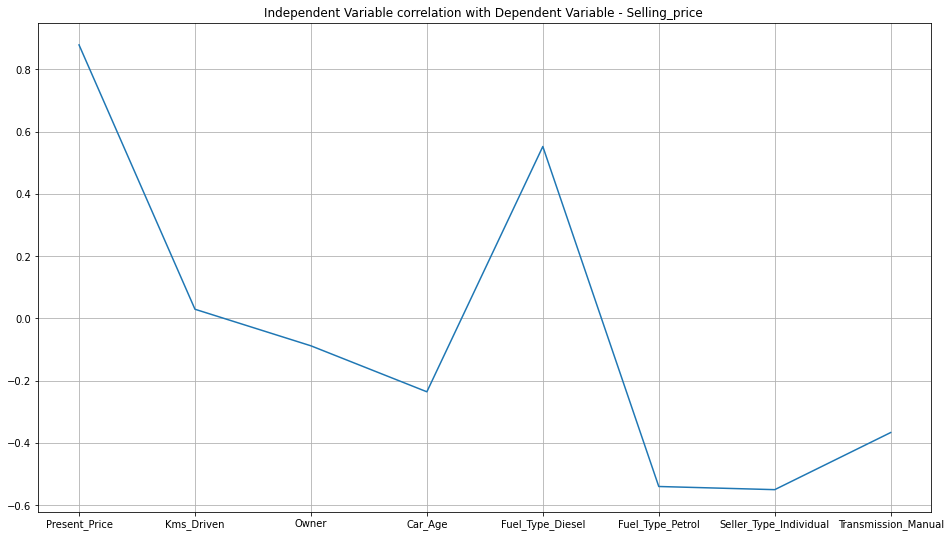

In [ ]:
c_data_3.corrwith(c_data_ohe["Selling_Price"]).plot.line(
    figsize= (16,9), title= "Independent Variable correlation with Dependent Variable - Selling_price ", grid= True,
)

## HeatMap

In [ ]:
# Define a variable by creating an instance

corr = c_data_ohe.corr()

<Axes: >

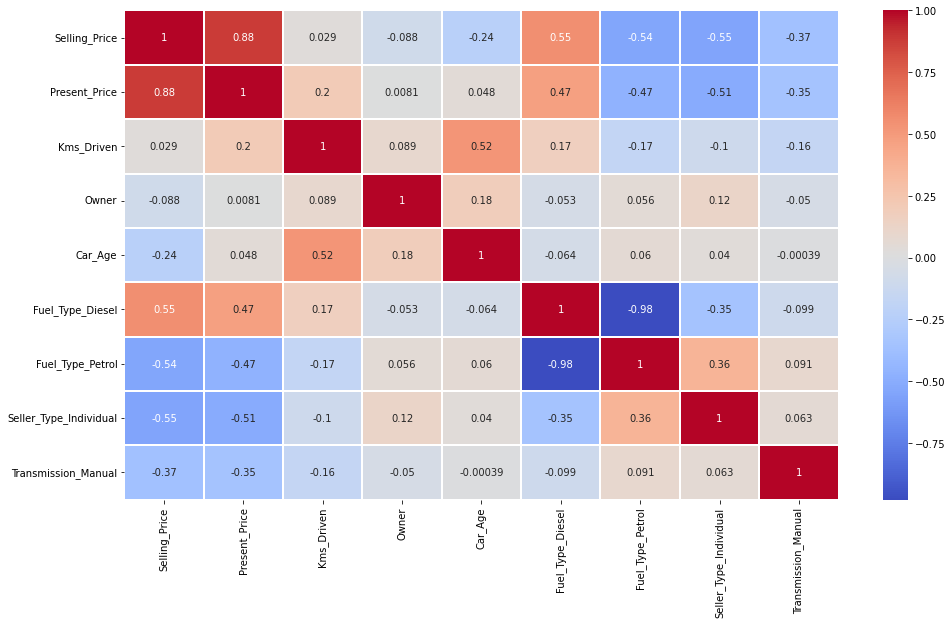

In [ ]:
plt.figure(figsize= (16,9))
sns.heatmap(corr, annot= True, cmap= "coolwarm", linewidths= 2)

## Dataset Splitting

In [ ]:
# Recall dataset-ohe head

c_data_ohe.head(-5)

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...
291,5.40,6.10,31427,0,8,0,1,0,1
292,6.40,8.40,12000,0,7,0,1,0,1
293,3.25,9.90,38000,0,13,0,1,0,1
294,3.75,6.80,33019,0,9,0,1,0,1


In [ ]:
# Define the matrix of features / Independent Variables

x = c_data_3

In [ ]:
# Define the Target Variable - Dependent variable

y = c_data_ohe["Selling_Price"]

In [ ]:
# Import the Library

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [ ]:
# Observing shapes
xtrain = x_train.shape
xtest = x_test.shape
ytrain = y_train.shape
ytest = y_test.shape


print("xtrain: {}  \nxtest: {} \nytrain: {}  \nytest: {} ".format(xtrain, xtest, ytrain, ytest))

xtrain: (240, 8)  
xtest: (61, 8) 
ytrain: (240,)  
ytest: (61,) 


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating an Instance of the StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Show Scaling
x_train

array([[ 0.1466226 ,  1.05706025, -0.1393466 , ..., -2.02642122,
        -0.7540739 ,  0.37073003],
       [-0.35552552, -0.3529268 , -0.1393466 , ...,  0.49348082,
        -0.7540739 ,  0.37073003],
       [ 3.19298791, -0.77406088, -0.1393466 , ..., -2.02642122,
        -0.7540739 , -2.69738059],
       ...,
       [-0.63784436, -0.58381453, -0.1393466 , ...,  0.49348082,
         1.32612997,  0.37073003],
       [-0.3867703 ,  0.62900596, -0.1393466 , ...,  0.49348082,
        -0.7540739 ,  0.37073003],
       [-0.77844584, -0.59094876, -0.1393466 , ...,  0.49348082,
         1.32612997,  0.37073003]])

In [ ]:
x_test

array([[ 0.19906919,  0.54294327, -0.1393466 , -0.48653618,  2.081666  ,
        -2.02642122, -0.7540739 ,  0.37073003],
       [-0.75769038, -0.77406088, -0.1393466 ,  0.8712392 , -0.48038446,
         0.49348082,  1.32612997,  0.37073003],
       [-0.21380816, -0.32988321, -0.1393466 , -0.48653618, -0.48038446,
         0.49348082, -0.7540739 ,  0.37073003],
       [ 0.44456383, -0.10848402, -0.1393466 , -0.82598002,  2.081666  ,
        -2.02642122, -0.7540739 ,  0.37073003],
       [ 1.35624165, -0.56003373, -0.1393466 , -1.16542386,  2.081666  ,
        -2.02642122, -0.7540739 , -2.69738059],
       [-0.18367928, -0.78357319, -0.1393466 , -0.82598002, -0.48038446,
         0.49348082, -0.7540739 ,  0.37073003],
       [-0.09217673, -0.08441785, -0.1393466 ,  0.53179535, -0.48038446,
         0.49348082, -0.7540739 ,  0.37073003],
       [-0.7884888 , -0.89296485, -0.1393466 , -0.82598002, -0.48038446,
         0.49348082,  1.32612997,  0.37073003],
       [-0.09217673, -0.15576024

# Part-2: Model Building

## Model-1: Multiple Linear Regression

In [ ]:
# Import class

from sklearn.linear_model import LinearRegression

In [ ]:
# Creating an instance of the class

regressor_mlr = LinearRegression()

In [ ]:
# Train the Model

regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make Prediction

y_pred = regressor_mlr.predict(x_test)

In [ ]:
y_pred

array([ 7.51749959, -0.38136   ,  4.2559471 ,  9.00719207, 14.4269339 ,
        4.87144495,  3.50800415,  1.44729345,  5.3451756 ,  4.61435641,
        2.26758534,  1.6209573 ,  5.0502457 ,  7.5592941 ,  8.60637169,
       13.98391877,  7.32792948,  4.23074458, -0.43329109,  2.36959252,
        4.98862734,  3.82566592,  6.43249291,  8.02059313, -1.89494718,
        1.92952344, -0.82194725,  0.82000278,  0.0287008 ,  7.09763522,
        3.56594643,  7.42982762,  0.72122573,  7.93570184,  3.51526022,
        1.8051379 ,  5.54534144,  6.9878273 , -2.62961763,  9.08622868,
        9.21468651, 20.02249841,  4.37997532,  3.85349481,  6.66353853,
        9.8481939 ,  0.13251979,  1.68098927,  5.0992548 ,  7.35232556,
        8.07177253,  4.17227139,  4.84915569, 20.36876087,  1.7479962 ,
        1.30291959,  0.30682078,  1.98321103,  3.37503799,  0.87901548,
        3.52730876])

### Performance Evaluation

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the performance



r2 = r2_score(y_test, y_pred)

print(r2*100,"%")


91.44342972228512 %


## Model-2: Random Forest Regression

In [ ]:
 # Import Class

 from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Creating an instance of the class

regressor_rf = RandomForestRegressor()

In [ ]:
# Train the Model

regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Make Prediction

y_pred = regressor_rf.predict(x_test)

In [ ]:
y_pred

array([ 6.781 ,  0.4695,  4.635 ,  9.1098, 15.0398,  5.269 ,  3.1275,
        0.4381,  4.004 ,  4.747 ,  2.8775,  0.7897,  4.8155,  7.3179,
        7.7178, 14.6614,  6.6454,  3.9725,  0.4498,  1.583 ,  3.0185,
        5.013 ,  5.289 ,  9.7071,  0.1997,  0.7378,  0.3198,  0.6979,
        0.479 ,  4.0681,  2.4298,  6.012 ,  0.4893,  7.4324,  3.2114,
        1.1677,  5.614 ,  5.3805,  0.2431,  7.922 ,  8.0047, 22.585 ,
        4.945 ,  4.433 ,  5.7605, 11.4447,  0.2294,  0.8122,  5.4745,
        6.6745,  6.8687,  3.1225,  5.327 , 23.9625,  1.1723,  1.1309,
        0.4572,  2.4695,  3.507 ,  2.458 ,  3.8345])

### Performance Evaluation

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the performance

r2 = r2_score(y_test, y_pred)

print(r2*100,"%")


95.89710590633909 %


# Part-3: Parameter Optimization

In [ ]:
# ImportClass

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define a variable

parameters = {
    "n_estimators": [100, 200, 300,  400, 500, 600, 700, 800, 900, 1000],
    "criterion": ["mse", "mae"],
    "max_depth": [10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 5, 10, 15],
    "max_features": ["auto", "sqrt", "log2"],

}

In [ ]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}

In [ ]:
param_grid

{'n_estimators': [100, 500, 1000],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}

In [ ]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['mse', 'mae'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10, 15],
 'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
# Create an Instance
random_cv = RandomizedSearchCV(estimator= regressor_rf, param_distributions= param_grid, n_iter= 10,
                               scoring= "neg_mean_absolute_error", cv= 5, verbose= 2, n_jobs= -1)

In [ ]:
# Train the model

random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='poisson', max_depth=20,
                      max_features='sqrt', n_estimators=1000)

In [ ]:
random_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'poisson',
 'bootstrap': False}

In [ ]:
random_cv.best_score_

-0.8272835416666651

# Part-4: Final Model -[Random Forest]

##Model-3: Random Forest Regression-X

In [ ]:
 # Import Class
from sklearn.ensemble import RandomForestRegressor
# Create an instance of class and apply best estimator
regressor = RandomForestRegressor(bootstrap=False, criterion='poisson', max_depth=20,
                      max_features='sqrt', n_estimators=1000)
# Train the Model
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='poisson', max_depth=20,
                      max_features='sqrt', n_estimators=1000)

In [ ]:
# Make a New Prediction
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([ 7.14245   ,  0.47931   ,  5.0169    ,  9.45691   , 18.04585   ,
        5.2759    ,  3.1871    ,  0.72769   ,  4.4909    ,  4.4982    ,
        2.85336   ,  0.87874   ,  4.9481    ,  8.73332   ,  7.75      ,
       11.65698   ,  7.1223    ,  3.99475   ,  0.46523333,  1.55145   ,
        4.06695   ,  4.93985   ,  5.8558    ,  9.16064   ,  0.18167   ,
        0.74672   ,  0.40005333,  0.5271275 ,  0.45784   ,  4.36803   ,
        5.30334   ,  5.85825   ,  0.4832875 ,  8.266     ,  3.56535   ,
        1.3488    ,  5.35035   ,  7.2031    ,  0.22708   ,  8.9227    ,
       10.7316    , 19.89035   ,  5.0116    ,  4.10405   ,  5.6087    ,
       12.69754   ,  0.301185  ,  0.89618   ,  5.58995   ,  7.637     ,
        7.8011    ,  3.31065   ,  5.0191    , 22.1575    ,  1.12019   ,
        1.10282   ,  0.59087   ,  2.55445   ,  3.44325   ,  1.64195   ,
        3.56509   ])

### Performance Evaluation

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the performance

r2 = r2_score(y_test, y_pred)

print(r2*100,"%")


93.70805024833435 %


# Part-5: Single Observation Prediction

In [ ]:
# Preview Data head and tail

c_data_3.head(-5)

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
291,6.10,31427,0,8,0,1,0,1
292,8.40,12000,0,7,0,1,0,1
293,9.90,38000,0,13,0,1,0,1
294,6.80,33019,0,9,0,1,0,1


In [ ]:
Single_Obs = [[ 5.59,	27000,	0,	9,	0,	1,	0,	1]]

In [ ]:
# Using Model-2

regressor_rf.predict(Single_Obs)

array([26.9085])

In [ ]:
# Using Model-3

regressor.predict(Single_Obs)

array([8.50491])